In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
df_col: List = ["col0" + str(i) for i in range(1, 4)]
df_row: List = [str(i) for i in range(1, 16)]

np.random.seed(42)
df = pd.DataFrame([[np.random.randint(1, 10), np.random.randint(1, 10), np.random.randint(1, 10)] for _ in range(15)], 
                    index=df_row, 
                    columns=df_col)
print(df)

    col01  col02  col03
1       7      4      8
2       5      7      3
3       7      8      5
4       4      8      8
5       3      6      5
6       2      8      6
7       2      5      1
8       6      9      1
9       3      7      4
10      9      3      5
11      3      7      5
12      9      7      2
13      4      9      2
14      9      5      2
15      4      7      8


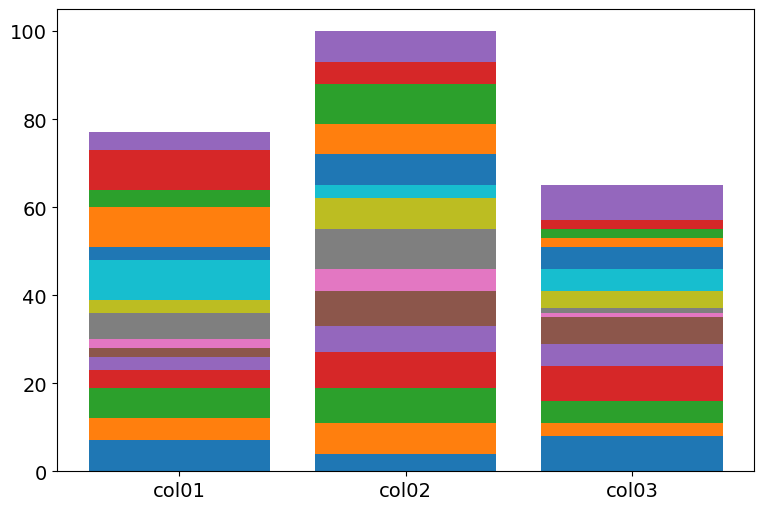

In [4]:
plt.figure(figsize=(9, 6))
btm_sum = 0
for i in range(1, 16):
    df_target = df.loc[str(i)]
    plt.bar(df_col, df_target, bottom=btm_sum)
    btm_sum = btm_sum + df_target
plt.show()

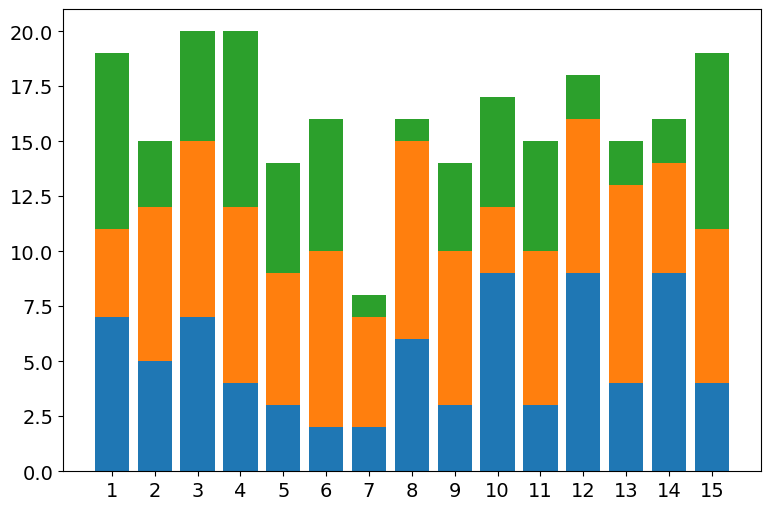

In [5]:
plt.figure(figsize=(9, 6))
btm_sum = 0
for i in range(1, 4):
    df_target = df["col0" + str(i)]
    plt.bar(df_row, df_target, bottom=btm_sum)
    btm_sum = btm_sum + df_target
plt.show()

In [6]:
df_norm = df.copy()
for col in df_norm.columns:
    df_norm[col] = df[col] / df.sum(axis=1)
df_norm.fillna(0)
df_norm = df_norm * 100
df_norm

,col01,col02,col03
1,36.842105,21.052632,42.105263
2,33.333333,46.666667,20.000000
3,35.000000,40.000000,25.000000
4,20.000000,40.000000,40.000000
5,21.428571,42.857143,35.714286
6,12.500000,50.000000,37.500000
7,25.000000,62.500000,12.500000
8,37.500000,56.250000,6.250000
9,21.428571,50.000000,28.571429
10,52.941176,17.647059,29.411765


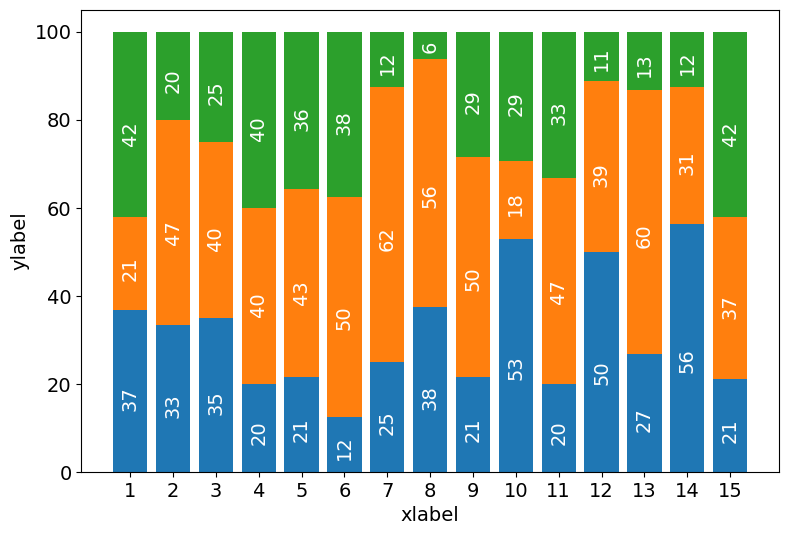

In [9]:
plt.figure(figsize=(9, 6))

btm_sum = 0
for i in range(1, 4):
    df_target = df_norm["col0" + str(i)]
    plt.bar(df_row, df_target, bottom=btm_sum)
    btm_sum = btm_sum + df_target

for i, v in enumerate(df_norm["col01"]):
    if v < 1e-4:
        pass
    else:
        xpos = i
        ypos = round(v * 0.45, 2)
        plt.text(xpos, ypos, 
                    str(round(v)), rotation=90, color="white",
                    va="center", ha="center", fontsize=14)

for i, v in enumerate(df_norm["col02"]):
    if v < 1e-4:
        pass
    else:
        xpos = i
        ypos = round(v * 0.45, 2) + df_norm["col01"].iloc[i]
        plt.text(xpos, ypos, 
                    str(round(v)), rotation=90, color="white",
                    va="center", ha="center", fontsize=14)
            
for i, v in enumerate(df_norm["col03"]):
    if v < 1e-4:
        pass
    else:
        xpos = i
        ypos = round(v * 0.45, 2) + df_norm["col01"].iloc[i] + df_norm["col02"].iloc[i]
        plt.text(xpos, ypos, 
                    str(round(v)), rotation=90, color="white",
                    va="center", ha="center", fontsize=14)
            
plt.xlabel("xlabel")
plt.ylabel("ylabel")                                            
plt.show()